In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
dataset = pd.read_csv('bank-full.csv',sep = ';')

In [3]:
dataset.shape

(45211, 17)

In [4]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
dataset.dtypes       ##datatypes of each column

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
dataset.isnull().sum()    ##There is no missing values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
dataset.drop_duplicates()   ## droping the duplicate rows but there is no duplicate rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Analysis

In [8]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
dataset['y'] = dataset['y'].map({'no':0,'yes':1})   ## Replacing the values in y column for analysis purposes

In [10]:
minage = dataset['age'].min()
maxage = dataset['age'].max()
print("In this data the age ranges from ",minage,'-',maxage)

In this data the age ranges from  18 - 95


In [11]:
agegroup = []
for i in dataset['age']:
    if i in range(18,26):
        agegroup.append('18-25')
    elif i in range(26,36):
        agegroup.append('26-35')
    elif i in range(36,46):
        agegroup.append('36-45')
    elif i in range(46,56):
        agegroup.append('46-55')
    elif i in range(56,66):
        agegroup.append('56-65')
    elif  i in range(66,76):
        agegroup.append('66-75')
    elif i in range(76,86):
        agegroup.append('76-85')
    elif i in range(86,96):
        agegroup.append('86-95')
        
dataset['agegroup'] = agegroup       ## Creating new column for age group

In [12]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agegroup
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,56-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,36-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-55
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,26-35


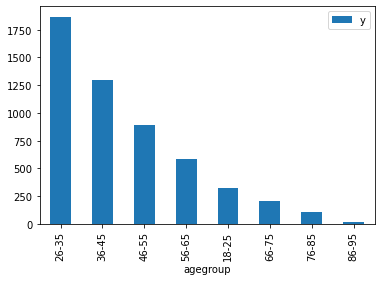

In [13]:
a = dataset.groupby(['agegroup']).sum()
a = a.sort_values(by = 'y' , ascending = False)
bargraph = a.plot.bar(y = 'y' , fontsize = 10)

This graph shows the number of people bought term deposit in each age groups. The age groups between 26-45 bought more number of term-deposits

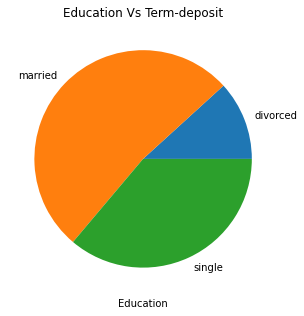

In [14]:
a =  dataset.groupby('marital').sum()

mylabels = ['divorced','married','single']
y = list(a['y'])

fig = plt.figure(figsize = (17, 5))
plt.pie(y, labels = mylabels)
# creating the pie plot
plt.title("Education Vs Term-deposit")
plt.xlabel('Education')
plt.show()

This Pie-Chart shows the proportion of people who bought term-deposit with respect to their marital status

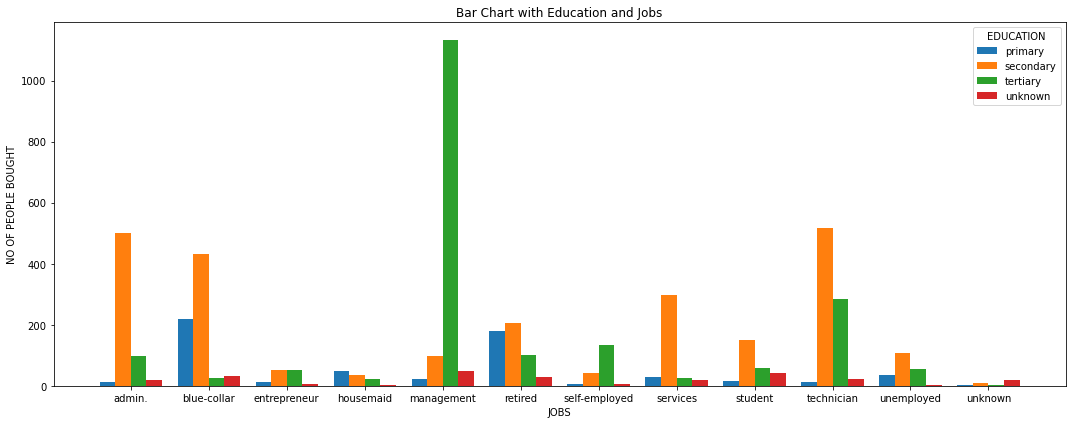

In [15]:
# DataFrame
data = dataset[['job','education','y']]
df = pd.DataFrame(data)

# Grouping the data by 'job' and 'education'
grouped = df.groupby(['job', 'education'])['y'].sum().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar width and positions
num_sub_categories = len(grouped.columns)
total_bar_width = 0.8
bar_width = total_bar_width / num_sub_categories
x_positions = np.arange(len(grouped.index))

# Create bars for each 'education'types
for i, sub_category in enumerate(grouped.columns):
    ax.bar(x_positions + i * bar_width - total_bar_width/2 + bar_width/2, grouped[sub_category], bar_width, label=sub_category)

# Customizing the plot
ax.set_title('Bar Chart with Education and Jobs')
ax.set_xlabel('JOBS')
ax.set_ylabel('NO OF PEOPLE BOUGHT')
ax.set_xticks(x_positions)
ax.set_xticklabels(grouped.index)
ax.legend(title='EDUCATION')

# Show the plot
plt.tight_layout()
plt.show()

This graph shows the number of people bought the term-deposit with respect to their education and their jobs . It indicates that a person who has teritary education and working in management has high chance of buying the term-deposit.

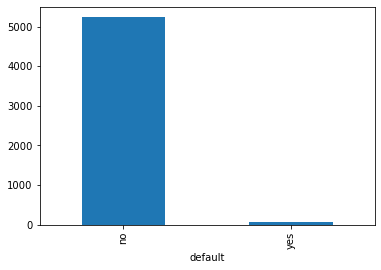

In [16]:
a = dataset.groupby(['default'])['y'].sum()
bargraph = a.plot.bar(y = 'y', fontsize=10)

It is obvious that if a person has credit in default already,the chances of buying the term-deposit is very less.

In [17]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,agegroup
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,56-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,36-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-55
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,26-35


<AxesSubplot:xlabel='y', ylabel='balance'>

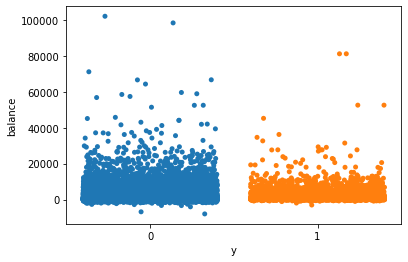

In [18]:
sns.stripplot(x='y', y='balance', data=dataset, jitter=0.4)

The above graph shows the relationship between balance and y

In [19]:
dataset[['housing','loan']].value_counts()     ## Number of people having housing and personal loans

housing  loan
yes      no      20763
no       no      17204
yes      yes      4367
no       yes      2877
dtype: int64

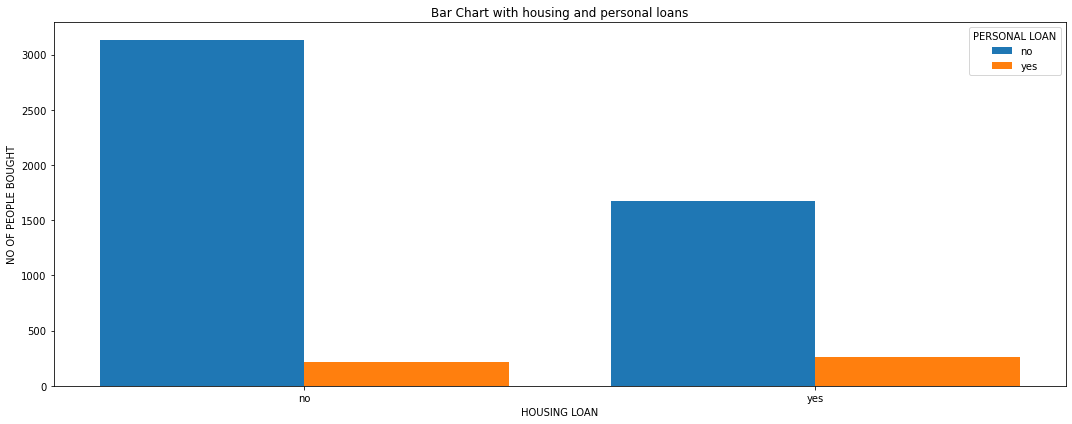

In [20]:
# DataFrame
data = dataset[['housing','loan','y']]
df = pd.DataFrame(data)

# Grouping the data by 'job' and 'education'
grouped = df.groupby(['housing', 'loan'])['y'].sum().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar width and positions
num_sub_categories = len(grouped.columns)
total_bar_width = 0.8
bar_width = total_bar_width / num_sub_categories
x_positions = np.arange(len(grouped.index))

# Create bars for each 'education'types
for i, sub_category in enumerate(grouped.columns):
    ax.bar(x_positions + i * bar_width - total_bar_width/2 + bar_width/2, grouped[sub_category], bar_width, label=sub_category)

# Customizing the plot
ax.set_title('Bar Chart with housing and personal loans')
ax.set_xlabel('HOUSING LOAN')
ax.set_ylabel('NO OF PEOPLE BOUGHT')
ax.set_xticks(x_positions)
ax.set_xticklabels(grouped.index)
ax.legend(title='PERSONAL LOAN')

# Show the plot
plt.tight_layout()
plt.show()

This shows that the person having personal loan already has less chance of buying the term-deposit

In [21]:
daygroup = []
for i in dataset['day']:
    if i in range(1,11):
        daygroup.append('1-10')
    elif i in range(11,21):
        daygroup.append('11-20')
    elif i in range(21,32):
        daygroup.append('21-31')
        
dataset['daygroup'] = daygroup

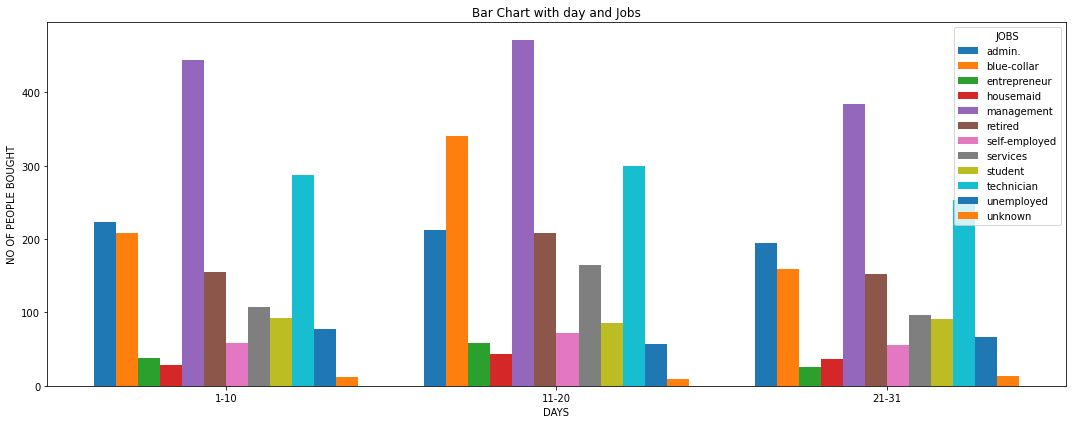

In [22]:
# DataFrame
data = dataset[['daygroup','job','y']]
df = pd.DataFrame(data)

# Grouping the data by 'job' and 'education'
grouped = df.groupby(['daygroup', 'job'])['y'].sum().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Bar width and positions
num_sub_categories = len(grouped.columns)
total_bar_width = 0.8
bar_width = total_bar_width / num_sub_categories
x_positions = np.arange(len(grouped.index))

# Create bars for each 'job'types
for i, sub_category in enumerate(grouped.columns):
    ax.bar(x_positions + i * bar_width - total_bar_width/2 + bar_width/2, grouped[sub_category], bar_width, label=sub_category)

# Customizing the plot
ax.set_title('Bar Chart with day and Jobs')
ax.set_xlabel('DAYS')
ax.set_ylabel('NO OF PEOPLE BOUGHT')
ax.set_xticks(x_positions)
ax.set_xticklabels(grouped.index)
ax.legend(title='JOBS')

# Show the plot
plt.tight_layout()
plt.show()

NO of sales in days between 11 and 20 for blue-collar jobs is higher.

<AxesSubplot:xlabel='y', ylabel='duration'>

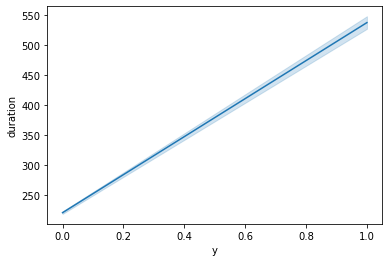

In [23]:
sns.lineplot(x = dataset['y'],y = dataset['duration'])

This graph clearly shows that as the duration is increasing the possibility of person buying term-deposit is also increasing . It has positive correlation.

<AxesSubplot:>

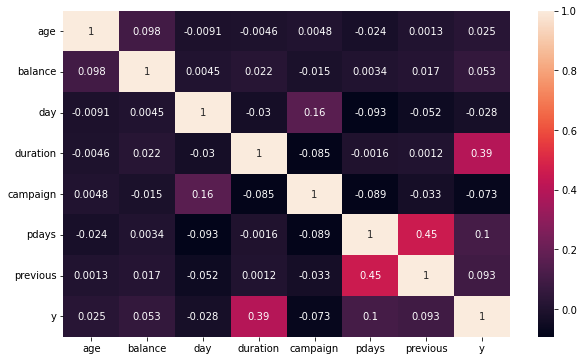

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr() , annot = True)

Here the correlation between duration and Output is relatively high. Therefore, the feature duration can be given more weightage for model building

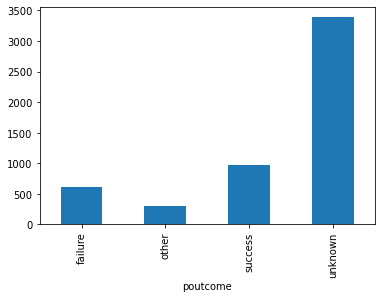

In [25]:
a = dataset.groupby('poutcome')['y'].sum()
bargraph = a.plot.bar(y = 'y')

# Model Building

In [26]:
## importing the library required for model building
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
## Droping age column as it is not required no more
dataset.drop('age',axis = 1,inplace = True)
dataset.drop('day',axis = 1,inplace = True)

In [28]:
## Seperating independent and dependent features
x = dataset.iloc[:,:-3] 
x['agegroup'] = list(dataset['agegroup'])
del x['previous']
del x['month']
y = dataset['y']

In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [30]:
## One-hot encoding 
x = pd.get_dummies(x,columns = ['job','marital','education','contact','poutcome','agegroup'])
x.shape

(45211, 41)

In [31]:
## label encoding
default_mapping = {'yes':1 , 'no':0}
housing_mapping = {'yes':1 , 'no':0}
loan_mapping    = {'yes':1 , 'no':0}
x['default'] = x['default'].map(default_mapping)
x['housing'] = x['housing'].map(housing_mapping)
x['loan']    = x['loan'].map(loan_mapping)

In [32]:
x.columns

Index(['default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'agegroup_18-25',
       'agegroup_26-35', 'agegroup_36-45', 'agegroup_46-55', 'agegroup_56-65',
       'agegroup_66-75', 'agegroup_76-85', 'agegroup_86-95'],
      dtype='object')

In [33]:
## Splitting train and test data
X_train , X_test, y_train , y_test = train_test_split(x,y,test_size = 0.33,random_state = 324)

In [34]:
## Fitting our train data to train our model
classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [35]:
## predicted values on our test data
y_predict = classifier.predict(X_test)

In [36]:
## accuracy of our model
accuracy_score(y_test,y_predict)*100

90.33512064343164

In [37]:
confusion_matrix(y_test,y_predict)

array([[12825,   347],
       [ 1095,   653]], dtype=int64)

# Creating Pickle File for the model

In [38]:
import pickle

In [39]:
pickle.dump(classifier,open('model.pkl','wb'))

In [40]:
pickle_model = pickle.load(open('model.pkl','rb'))

In [46]:
## Single-input function
def output(raw_input):
    job_mapping = {'admin.':[1,0,0,0,0,0,0,0,0,0,0,0] , 'blue-collar':[0,1,0,0,0,0,0,0,0,0,0,0] , 'entrepreneur':[0,0,1,0,0,0,0,0,0,0,0,0] ,
               'housemaid':[0,0,0,1,0,0,0,0,0,0,0,0] , 'management':[0,0,0,0,1,0,0,0,0,0,0,0] , 'retired':[0,0,0,0,0,1,0,0,0,0,0,0],
               'self-employed':[0,0,0,0,0,0,1,0,0,0,0,0] , 'services':[0,0,0,0,0,0,0,1,0,0,0,0] , 'student':[0,0,0,0,0,0,0,0,1,0,0,0],
               'technician':[0,0,0,0,0,0,0,0,0,1,0,0] , 'unemployed':[0,0,0,0,0,0,0,0,0,0,1,0] , 'unknown':[0,0,0,0,0,0,0,0,0,0,0,1]}

    marital_mapping = {'divorced':[1,0,0] , 'married':[0,1,0] , 'single':[0,0,1]}

    education_mapping = {'primary':[1,0,0,0] , 'secondary':[0,1,0,0] , 'tertiary':[0,0,1,0] , 'unknown':[0,0,0,1]}

    contact_mapping = {'cellular':[1,0,0] , 'telephone':[0,1,0] , 'unknown':[0,0,1]}

    poutcome_mapping = {'failure':[1,0,0,0] , 'other':[0,1,0,0] , 'success':[0,0,1,0] , 'unknown':[0,0,0,1]}

    age_mapping = {'18-25':[1,0,0,0,0,0,0,0] , '26-35':[0,1,0,0,0,0,0,0] , '36-45':[0,0,1,0,0,0,0,0] , '46-55':[0,0,0,1,0,0,0,0],
               '56-65':[0,0,0,0,1,0,0,0] , '66-75':[0,0,0,0,0,1,0,0] , '76-85':[0,0,0,0,0,0,1,0] , '86-95':[0,0,0,0,0,0,0,1]}

    single_input = []
    for i in range(0,7):
        single_input.append(raw_input[i])
    for i in range(7,13):
        if raw_input[i] in list(dataset['job'].unique()):
            one_hot_input = job_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)
        elif raw_input[i] in list(dataset['marital'].unique()):
            one_hot_input = marital_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)
        elif raw_input[i] in list(dataset['education'].unique()):
            one_hot_input = education_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)
        elif raw_input[i] in list(dataset['contact'].unique()):
            one_hot_input = contact_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)
        elif raw_input[i] in list(dataset['poutcome'].unique()):
            one_hot_input = poutcome_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)
        elif raw_input[i] in list(dataset['agegroup'].unique()):
            one_hot_input = age_mapping[raw_input[i]]
            for j in one_hot_input:
                single_input.append(j)

    if pickle_model.predict([list(single_input)]) == 1 :
        print("Higher chance for buy")
    elif pickle_model.predict([list(single_input)]) == 0:
        print("Lesser chance for buy")     

In [42]:
raw_input = [0,3343,0,0,700,1,-1,'management','married','primary','cellular','success','26-35']
output(raw_input)

Higher chance for buy


C:\Users\Mahi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
X_train.columns

Index(['default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'agegroup_18-25',
       'agegroup_26-35', 'agegroup_36-45', 'agegroup_46-55', 'agegroup_56-65',
       'agegroup_66-75', 'agegroup_76-85', 'agegroup_86-95'],
      dtype='object')

In [63]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [51]:
p = dataset.iloc[:,:-3] 
p['agegroup'] = list(dataset['agegroup'])
del p['previous']
del p['month']

In [55]:
csv_filename = 'modeldata'
p.to_csv(csv_filename, index=False)